In [37]:
# Import the required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [38]:
# Load the fraud data into a pandas DataFrame
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/15/Fraud_check.csv')

In [39]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [41]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Preprocess the data

In [42]:
data['Class'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
data.drop('Taxable.Income', axis=1, inplace=True)  # We don't need the taxable_income column anymore

In [43]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [44]:
data.Class.value_counts()

Good     476
Risky    124
Name: Class, dtype: int64

In [45]:
# Convert text labels to categorical values
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])  
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [46]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Select the columns to be scaled
columns_to_scale = data.columns[2:4]

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [48]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


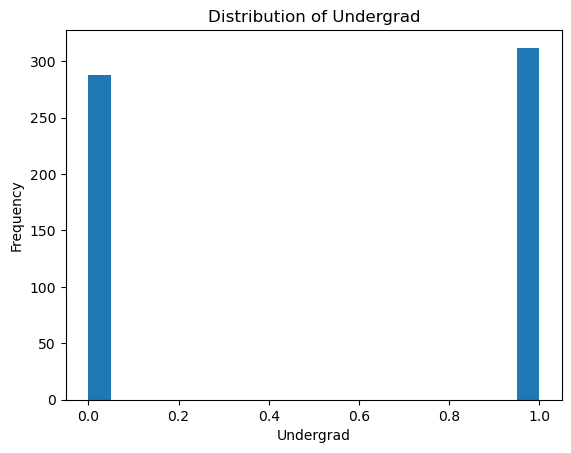

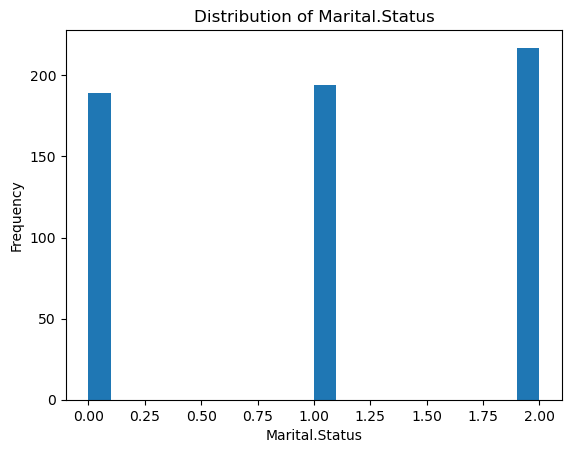

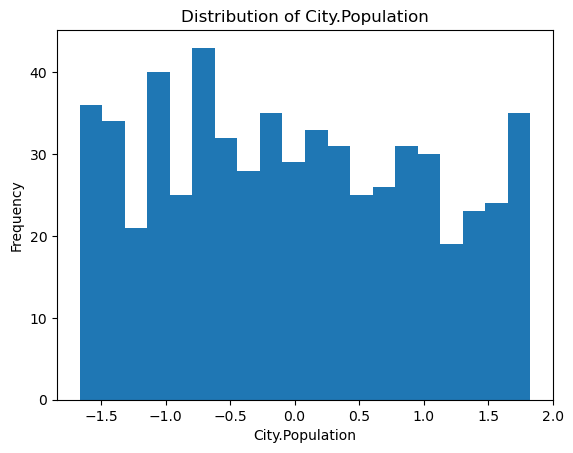

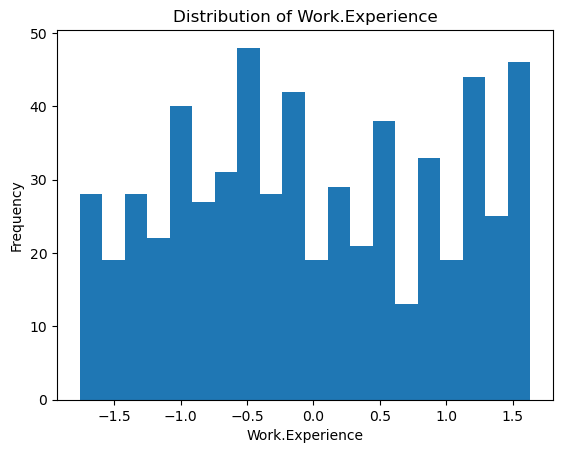

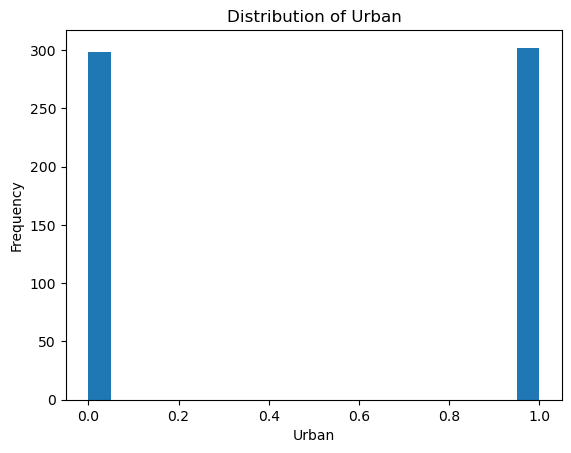

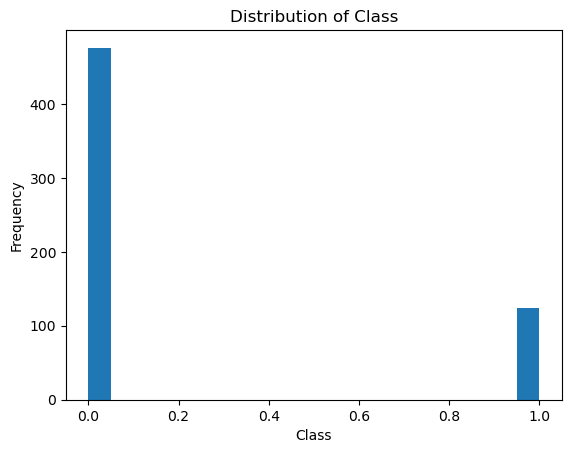

In [49]:
# Visulazing the distibution of the data for every feature

# Plot a histogram for each feature
import matplotlib.pyplot as plt

for column in data.columns:
    plt.figure()
    data[column].plot(kind='hist', bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Model building using Random forest

In [50]:
# Split the data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

In [53]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [55]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7583333333333333


##### Approximately 75.8% of the instances in the test set were correctly classified by the model.


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)

In [59]:
# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.48404255319148937


##### These evaluation metrics indicate that your Random Forest model did not perform well on the test set.

# grid search optimisation

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()



In [62]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

In [63]:
# Perform grid search optimization
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [64]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7933333333333332


##### These hyperparameters achieved the best score of approximately 0.7933333333333332 , which represents the mean cross-validated accuracy of the model when trained and evaluated using these hyperparameters.

# Check model's performance with best parameters 

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [66]:
# Create a Random Forest classifier with the best parameters
rf_classifier = RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=100)

In [67]:
# Train the model with the best parameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [68]:
# Evaluate the model's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7833333333333333


##### This means that around 78.3% of the instances in the test set were correctly classified by the model.
##### model's performance has improved compared to the initial accuracy of 0.758.

# K-Fold cross Validation

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [72]:
# Create a Random Forest classifier with the best parameters
rf_classifier = RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=100)

In [73]:
# Perform K-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(rf_classifier, X, y, cv=k)

In [74]:
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the average score
average_score = scores.mean()
print("Average Score:", average_score)

Cross-Validation Scores: [0.8        0.79166667 0.79166667 0.79166667 0.79166667]
Average Score: 0.7933333333333332


##### The cross-validation scores are relatively consistent, ranging from approximately 0.79166667 to 0.8.
##### The average score of 0.7933333333333332 suggests that the model's performance is consistent and reasonably good.